# Project 2: Heart Disease Prediction

By: ER SENG SIANG

e:  amos.erss@gmail.com

LinkedIn: https://www.linkedin.com/in/amoserss

## 1. Business Problem

Heart disease is a leading cause of mortality worldwide. Early detection and accurate prediction of heart disease can significantly improve patient outcomes by enabling timely intervention and preventive measures. The objective of this project is to develop a machine learning model that can effectively predict the presence or absense of heart disease based on variod medical and lifestyle factors.

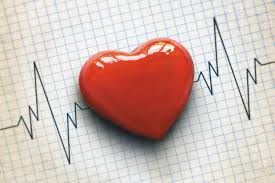

We use the following classification algorithms to classify the target variable (disease) based on independent variables:

#### 1) Neural Network
#### 2) Logistic regression
#### 3) K nearest neighbors
#### 4) Support vector machine
#### 5) Decision tree
#### 6) Gradient Boosting
#### 7) Random forest

Then, we will compare the accuracy from all these models to decide which one performs best.
The best performing model will be selected to the heart disease.

#### All models are evaluated considering the Confusion Matrix.  
* Accuracy
* Precision
* Recall

## 2. Data import

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

Importing and Reading the dataset

In [2]:
df = pd.read_csv('./Dataset/cardio_data.csv')
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


### Data Dictionary:

#### 1. date - The date on which examination was done.
#### 2. country - The country name of the patient.
#### 3. id - The unique ID of the patient.
#### 4. active - The physical activity of the patient.
#### 5. age (days) - The age of the patient.
#### 6. alco - Alcohol intake.
#### 7. ap_hi - Systolic blood pressure.
#### 8. ap_lo - Diastolic blood pressure.
#### 9. cholesterol - Cholesterol level of the patient.
#### 10. gender - The gender of the patient.
#### 11. gluc - Glucose level of the patient.
#### 12. height - Height of the patient.
#### 13. occupation - Occupation of the patient.
#### 14. smoke - Presence of smoking. 
#### 15. weight - Weight of the patient.
#### 16. disease - Presence of disease (Target Variable)

## 3. Data Understanding

### Basic exploration

In [3]:
df.shape

(70000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


In [5]:
df.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


In [6]:
df.isna().sum()

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64

Removing NaN / NULL vales from the data

In [7]:
df.dropna(axis = 0, inplace = True) 
print(df.shape)

(70000, 16)


In [8]:
# Drop the 'county_name' and 'state' columns
df.drop(['date', 'id'], axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      70000 non-null  object 
 1   active       70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   alco         70000 non-null  int64  
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gender       70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   height       70000 non-null  int64  
 10  occupation   70000 non-null  object 
 11  smoke        70000 non-null  int64  
 12  weight       70000 non-null  float64
 13  disease      70000 non-null  int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 7.5+ MB


In [9]:
df['age'] = round(df['age']/365).astype(int)
df['weight'] = df['weight'].astype(int)

In [10]:
df['country'] = df['country'].astype('category')
df['occupation'] = df['occupation'].astype('category')

#df['active'] = df['active'].astype('category')
#df['alco'] = df['alco'].astype('category')
#df['cholesterol'] = df['cholesterol'].astype('category')
#df['gender'] = df['gender'].astype('category')
#df['gluc'] = df['gluc'].astype('category')
#df['smoke'] = df['smoke'].astype('category')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      70000 non-null  category
 1   active       70000 non-null  int64   
 2   age          70000 non-null  int32   
 3   alco         70000 non-null  int64   
 4   ap_hi        70000 non-null  int64   
 5   ap_lo        70000 non-null  int64   
 6   cholesterol  70000 non-null  int64   
 7   gender       70000 non-null  int64   
 8   gluc         70000 non-null  int64   
 9   height       70000 non-null  int64   
 10  occupation   70000 non-null  category
 11  smoke        70000 non-null  int64   
 12  weight       70000 non-null  int32   
 13  disease      70000 non-null  int64   
dtypes: category(2), int32(2), int64(10)
memory usage: 6.0 MB


In [12]:
df.head()

,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,Indonesia,1,50,0,110,80,1,2,1,168,Architect,0,62,0
1,Malaysia,1,55,0,140,90,3,1,1,156,Accountant,0,85,1
2,Indonesia,0,52,0,130,70,3,1,1,165,Chef,0,64,1
3,Singapore,1,48,0,150,100,1,2,1,169,Lawyer,0,82,1
4,Singapore,0,48,0,100,60,1,1,1,156,Architect,0,56,0


In [13]:
#df['bmi'] = df['weight'] / ((df['height']/100)**2)
#df['bmi_'] = df['bmi'].round(decimals = 1)

In [14]:
#df.head()

### Exploring the target variable - disease

0    35021
1    34979
Name: disease, dtype: int64

<Axes: xlabel='disease', ylabel='count'>

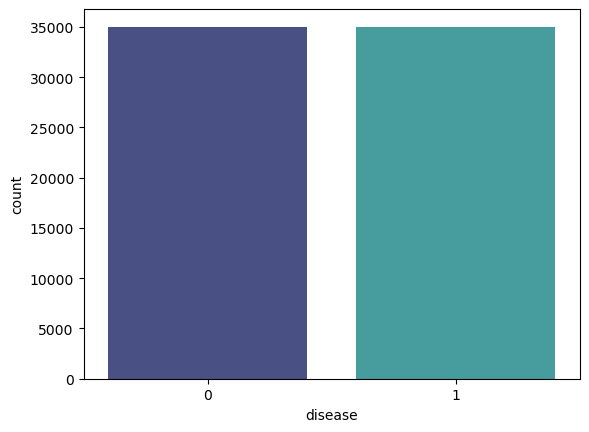

In [15]:
display(df['disease'].value_counts())
#sns.countplot(df['disease'], palette='magma')
sns.countplot(data=df, x='disease', palette='mako')

#### Observations from basic exploration:

1. There are total 70000 records/rows and 13 columns in the dataset after removing unwanted columns.
2. Most independent variables have int values.
3. The diease column which is the target, has categorical data.
4. There is no missing value in any row/column. Hence, no need to treat the missing values.
5. We have total 2 classes to classify. There is class balance in this dataset. 

In [16]:
#numerical_features = ["age", "CPK", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
#categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

### Data Visualization¶¶


Text(0.5, 1.0, 'Glucose vs HeartDisease')

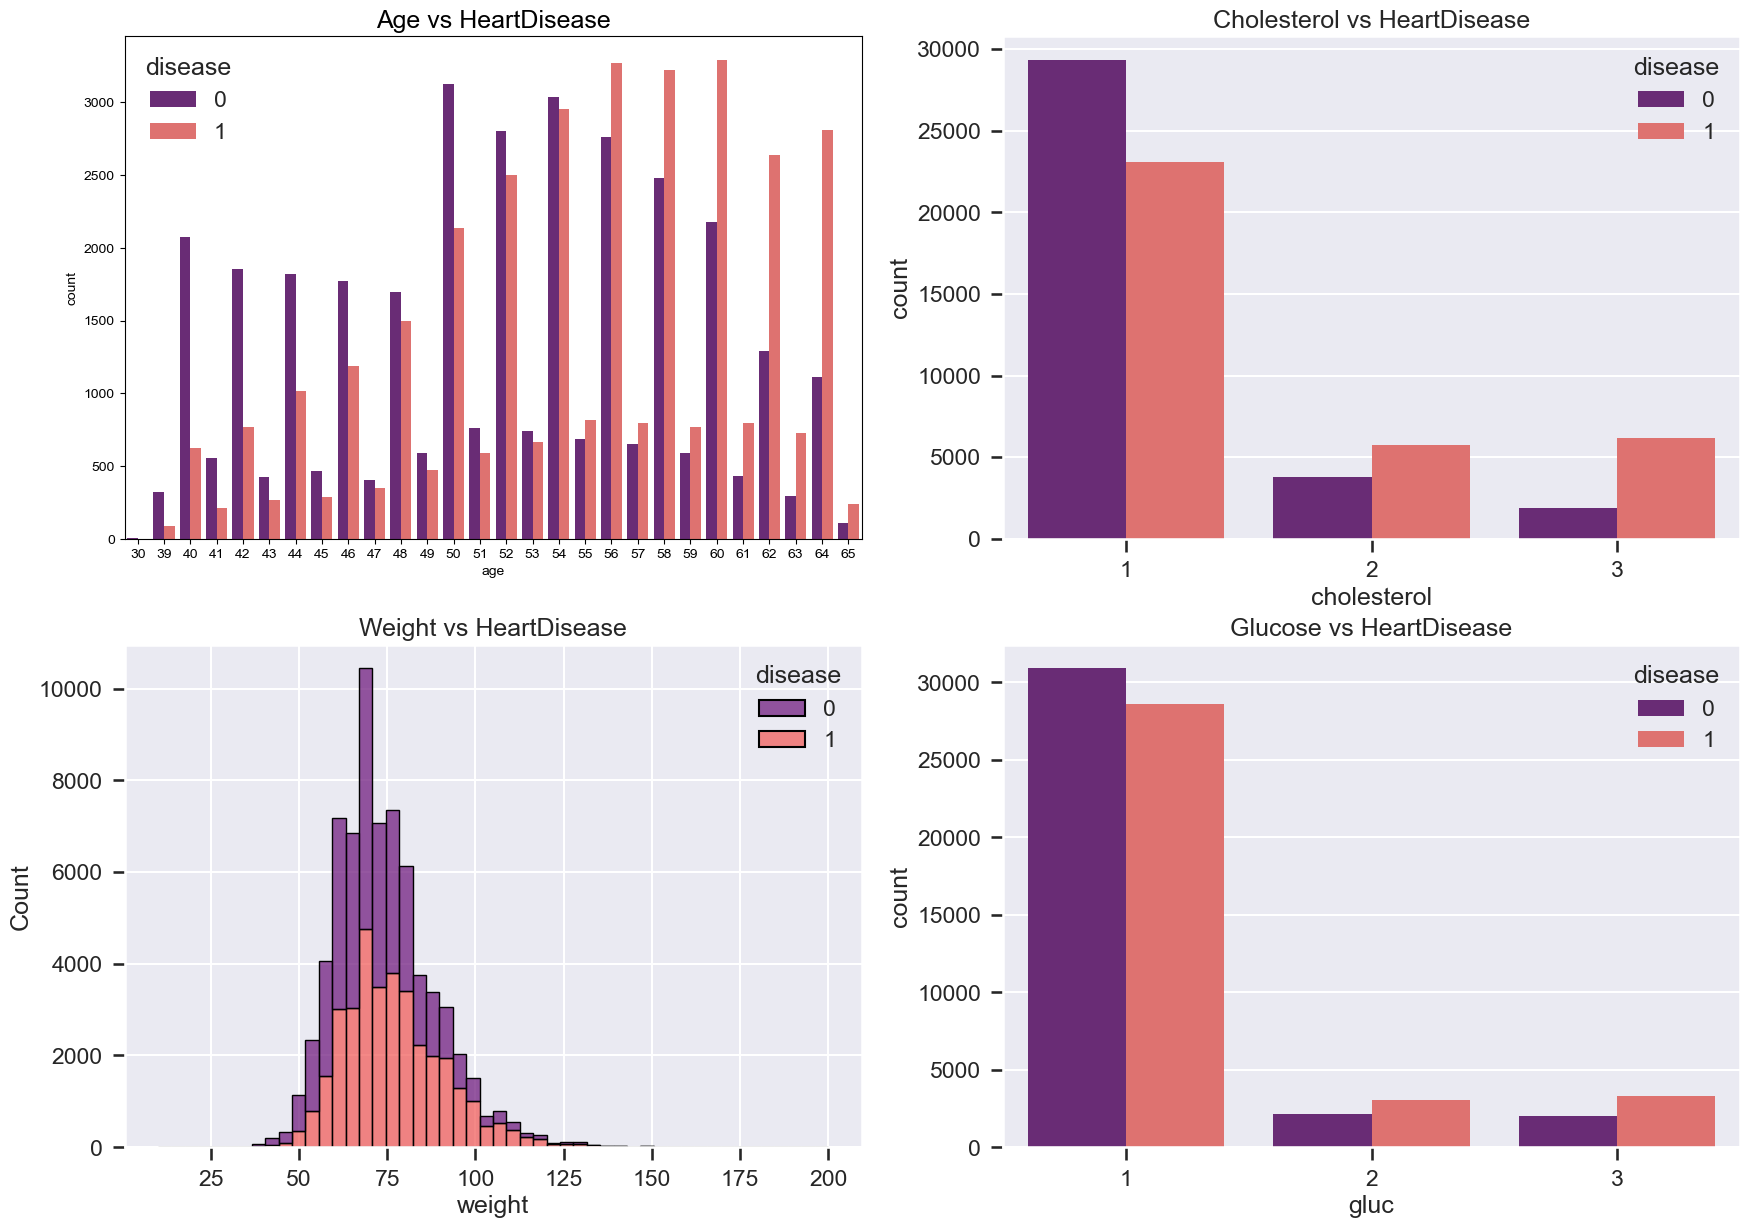

In [17]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.countplot(data=df, x='age', hue="disease",palette='magma')
#sns.histplot(data=df, x='age', hue="disease",bins=15, multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.countplot(data=df, x='cholesterol', hue="disease",palette='magma')
#sns.histplot(data=df, x='cholesterol', hue="disease",bins=3,multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='weight', hue="disease",bins=50,multiple="stack",palette='magma')
plt.title('Weight vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.countplot(data=df, x='gluc', hue="disease",palette='magma')
#sns.histplot(data=df, x='gluc', hue="disease",bins=3,multiple="stack",palette='magma')
plt.title('Glucose vs HeartDisease')



Text(0.5, 1.0, 'Height Distribution')

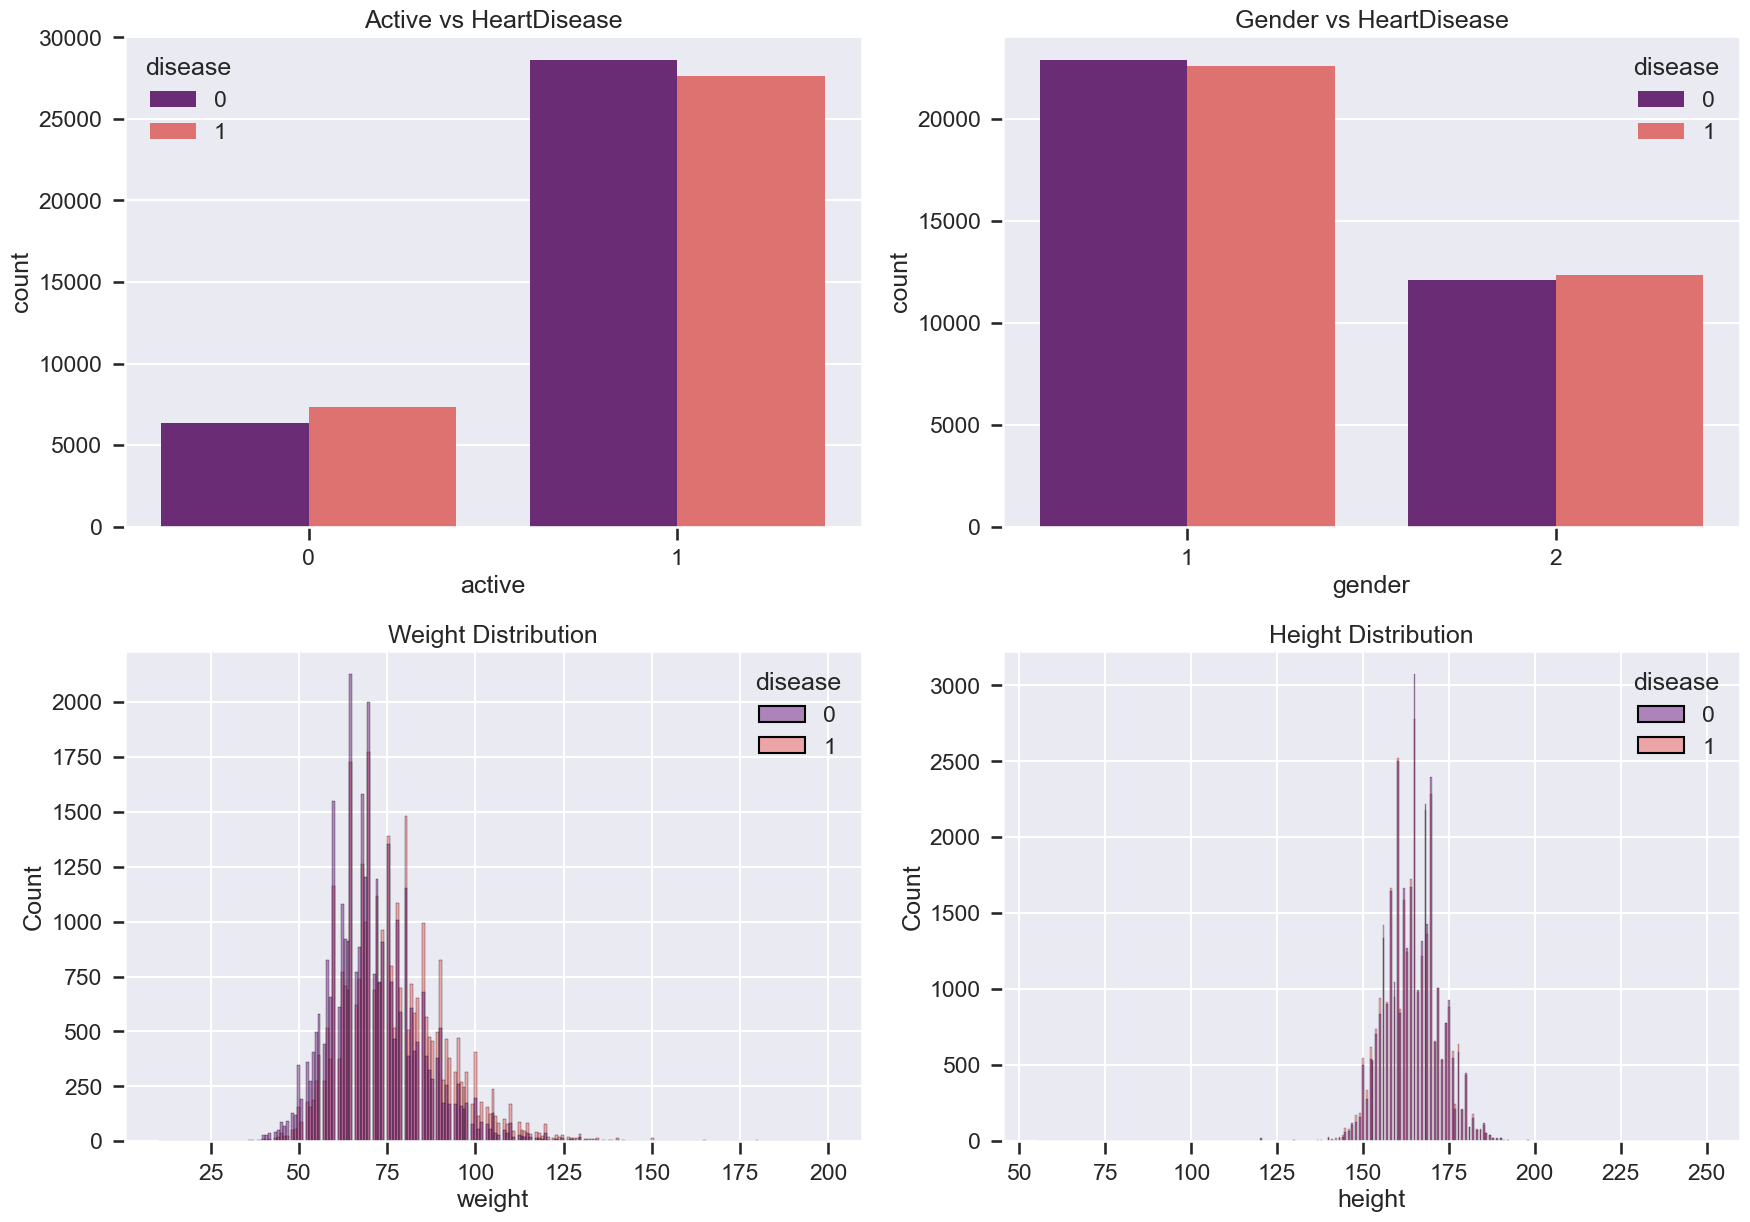

In [18]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.countplot(data=df, x='active', hue="disease",palette='magma')
#sns.histplot(data=df, x='active', hue="disease",bins=2, multiple="stack",palette='magma')
plt.title('Active vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.countplot(data=df, x='gender', hue="disease",palette='magma')
#sns.histplot(data=df, x='gender', hue="disease",bins=2,multiple="stack",palette='magma')
plt.title('Gender vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='weight', hue="disease",palette='magma')
#sns.distplot(df['weight'],  hist=False, rug=True);
plt.title('Weight Distribution')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='height', hue="disease",palette='magma')
#sns.distplot(df['height'],  hist=False, rug=True);
plt.title('Height Distribution')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Accountant'),
  Text(1, 0, 'Architect'),
  Text(2, 0, 'Chef'),
  Text(3, 0, 'Doctor'),
  Text(4, 0, 'Engineer'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Nurse'),
  Text(7, 0, 'Others'),
  Text(8, 0, 'Teacher')])

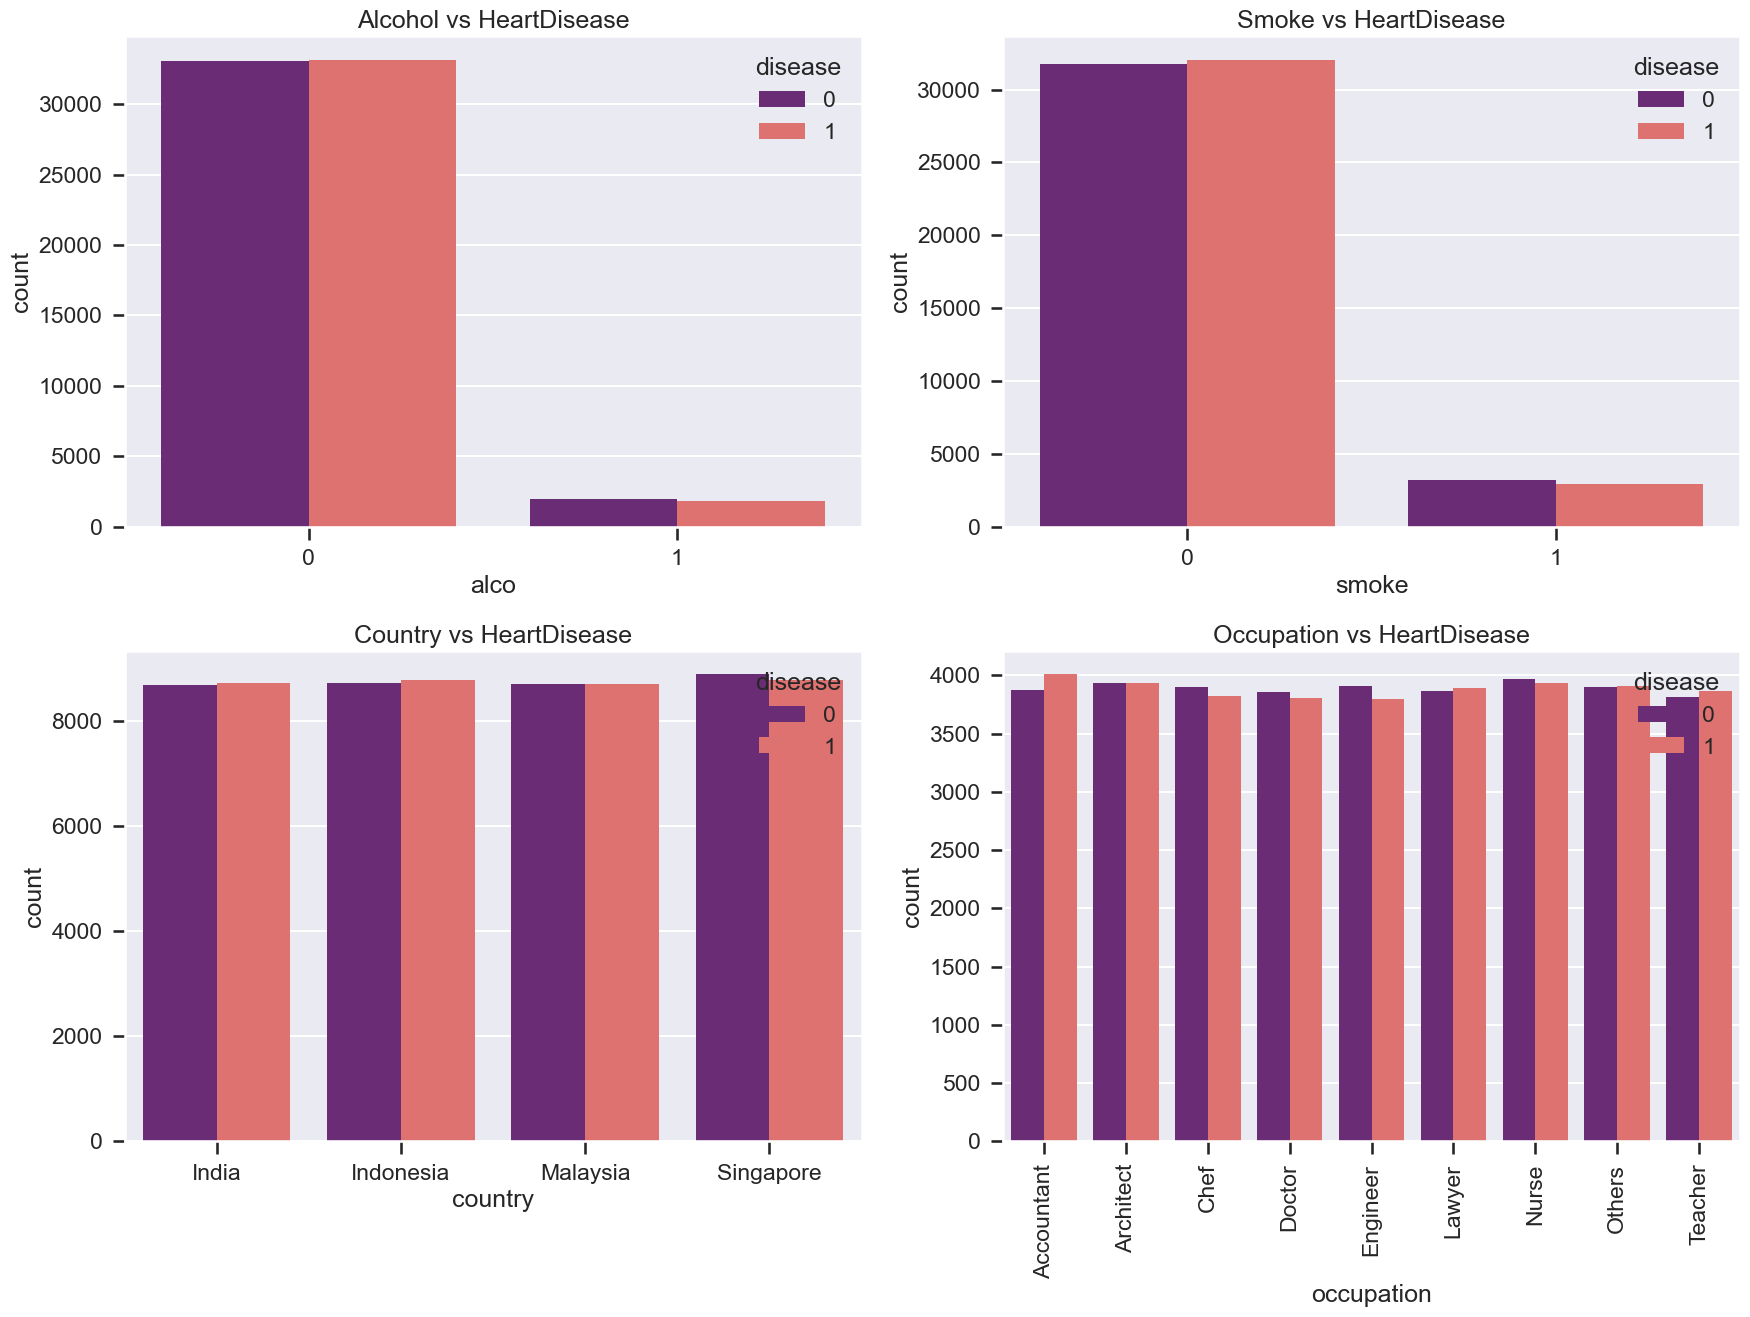

In [19]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.countplot(data=df, x='alco', hue="disease",palette='magma')
#sns.histplot(data=df, x='alco', hue="disease",bins=2, multiple="stack",palette='magma')
plt.title('Alcohol vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.countplot(data=df, x='smoke', hue="disease",palette='magma')
#sns.histplot(data=df, x='smoke', hue="disease",bins=2,multiple="stack",palette='magma')
plt.title('Smoke vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.countplot(data=df, x='country', hue="disease",palette='magma')
#sns.histplot(data=df, x='country', hue="disease",bins=3,multiple="stack",palette='magma')
plt.title('Country vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.countplot(data=df, x='occupation', hue="disease",palette='magma')
#sns.histplot(data=df, x='occupation', hue="disease",bins=10,multiple="stack",palette='magma')
plt.title('Occupation vs HeartDisease')
plt.xticks(rotation=90)

In [20]:
df.corr()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
active,1.000000,-0.009819,0.025476,-0.000033,0.004780,0.009911,0.005866,-0.006770,-0.006570,0.025858,-0.016864,-0.035653
age,-0.009819,1.000000,-0.029918,0.020793,0.017754,0.154386,-0.023017,0.098596,-0.081456,-0.047884,0.053667,0.237749
alco,0.025476,-0.029918,1.000000,0.001408,0.010601,0.035760,0.170966,0.011246,0.094419,0.340094,0.067077,-0.007330
ap_hi,-0.000033,0.020793,0.001408,1.000000,0.016086,0.023778,0.006005,0.011841,0.005488,-0.000922,0.030702,0.054475
ap_lo,0.004780,0.017754,0.010601,0.016086,1.000000,0.024019,0.015254,0.010806,0.006150,0.005186,0.043703,0.065719
cholesterol,0.009911,0.154386,0.035760,0.023778,0.024019,1.000000,-0.035821,0.451578,-0.050226,0.010354,0.141755,0.221147
gender,0.005866,-0.023017,0.170966,0.006005,0.015254,-0.035821,1.000000,-0.020491,0.499033,0.338135,0.155416,0.008109
gluc,-0.006770,0.098596,0.011246,0.011841,0.010806,0.451578,-0.020491,1.000000,-0.018595,-0.004756,0.106864,0.089307
height,-0.006570,-0.081456,0.094419,0.005488,0.006150,-0.050226,0.499033,-0.018595,1.000000,0.187989,0.291001,-0.010821
smoke,0.025858,-0.047884,0.340094,-0.000922,0.005186,0.010354,0.338135,-0.004756,0.187989,1.000000,0.067752,-0.015486


In [21]:
#df.hist(figsize = (15, 15))
#plt.show()

## Data Preprocessing

### Outliers treatment
Here are three techniques we can use to handle outliers:

1) Drop the outliers

2) Cap the outliers

3) Replace outliers using imputation as if they were missing values


In [22]:
def outliers_graph(df_column):
    Q75, Q25 = np.percentile(df_column, [75 ,25]) 
    IQR = Q75 - Q25
    print('Q25: ',Q25)
    print('Q75: ',Q75)
    print('Inter Quartile Range: ',IQR)
    
    #print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
    #print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q25-1.5*IQR]))
    #print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q75+1.5*IQR]))
    
    print('Outliers lie before', Q25-2*IQR, 'and beyond', Q75+2*IQR)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q25-2*IQR]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q75+2*IQR]))

In [23]:
outliers_graph(df['age'])

Q25:  48.0
Q75:  58.0
Inter Quartile Range:  10.0
Outliers lie before 28.0 and beyond 78.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0


In [24]:
outliers_graph(df['ap_hi'])

Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 80.0 and beyond 180.0
Number of Rows with Left Extreme Outliers: 207
Number of Rows with Right Extreme Outliers: 369


In [25]:
outliers_graph(df['ap_lo'])

Q25:  80.0
Q75:  90.0
Inter Quartile Range:  10.0
Outliers lie before 60.0 and beyond 110.0
Number of Rows with Left Extreme Outliers: 175
Number of Rows with Right Extreme Outliers: 1282


In [26]:
outliers_graph(df['weight'])

Q25:  65.0
Q75:  82.0
Inter Quartile Range:  17.0
Outliers lie before 31.0 and beyond 116.0
Number of Rows with Left Extreme Outliers: 10
Number of Rows with Right Extreme Outliers: 749


In [27]:
outliers_graph(df['height'])

Q25:  159.0
Q75:  170.0
Inter Quartile Range:  11.0
Outliers lie before 137.0 and beyond 192.0
Number of Rows with Left Extreme Outliers: 126
Number of Rows with Right Extreme Outliers: 41


### drop data with impossibly low blood pressure

In [28]:
#df = df.loc[df["ap_hi"] >40 ]
#df = df.loc[df["ap_lo"] >30 ]
#print(df)

In [29]:
#df[df['ap_hi'] < 41]
#df[df['ap_lo'] < 31]
#df.info()

Text(0.5, 1.0, 'Height Distribution after capping outliers')

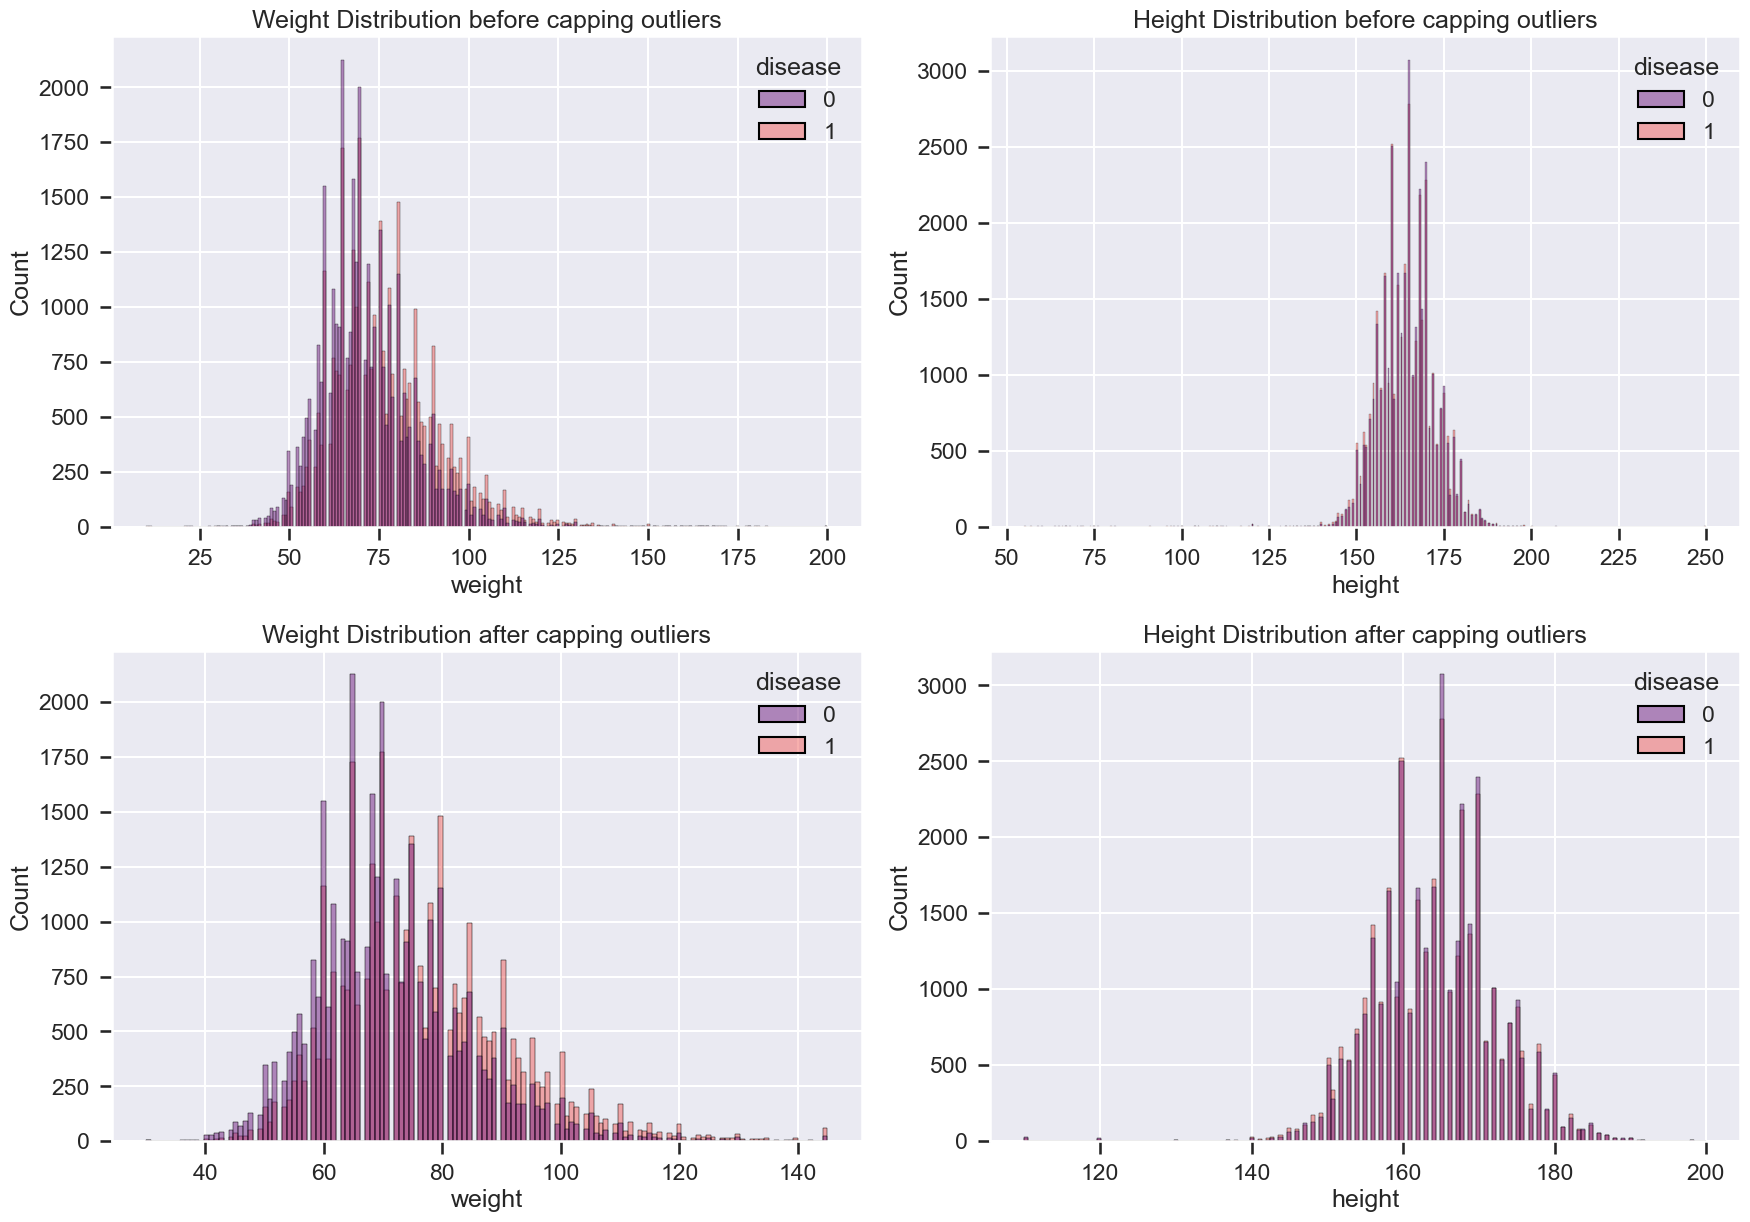

In [30]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='weight', hue="disease",palette='magma')
#sns.distplot(df['weight'],  hist=False, rug=True);
plt.title('Weight Distribution before capping outliers')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='height', hue="disease",palette='magma')
#sns.distplot(df['height'],  hist=False, rug=True);
plt.title('Height Distribution before capping outliers')

## cap the outliers using max thresholds
##
df['weight'] =  df['weight'].clip(lower=30, upper=145)
df['height'] =  df['height'].clip(lower=110, upper=200)

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='weight', hue="disease",palette='magma')
#sns.distplot(df['weight'],  hist=False, rug=True);
plt.title('Weight Distribution after capping outliers')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='height', hue="disease",palette='magma')
#sns.distplot(df['height'],  hist=False, rug=True);
plt.title('Height Distribution after capping outliers')

#### For both Systolic and Diastolic Blood pressure variables, cap the outliers using max thresholds.

Text(0.5, 1.0, 'Diastolic bp Distribution after capping outliers')

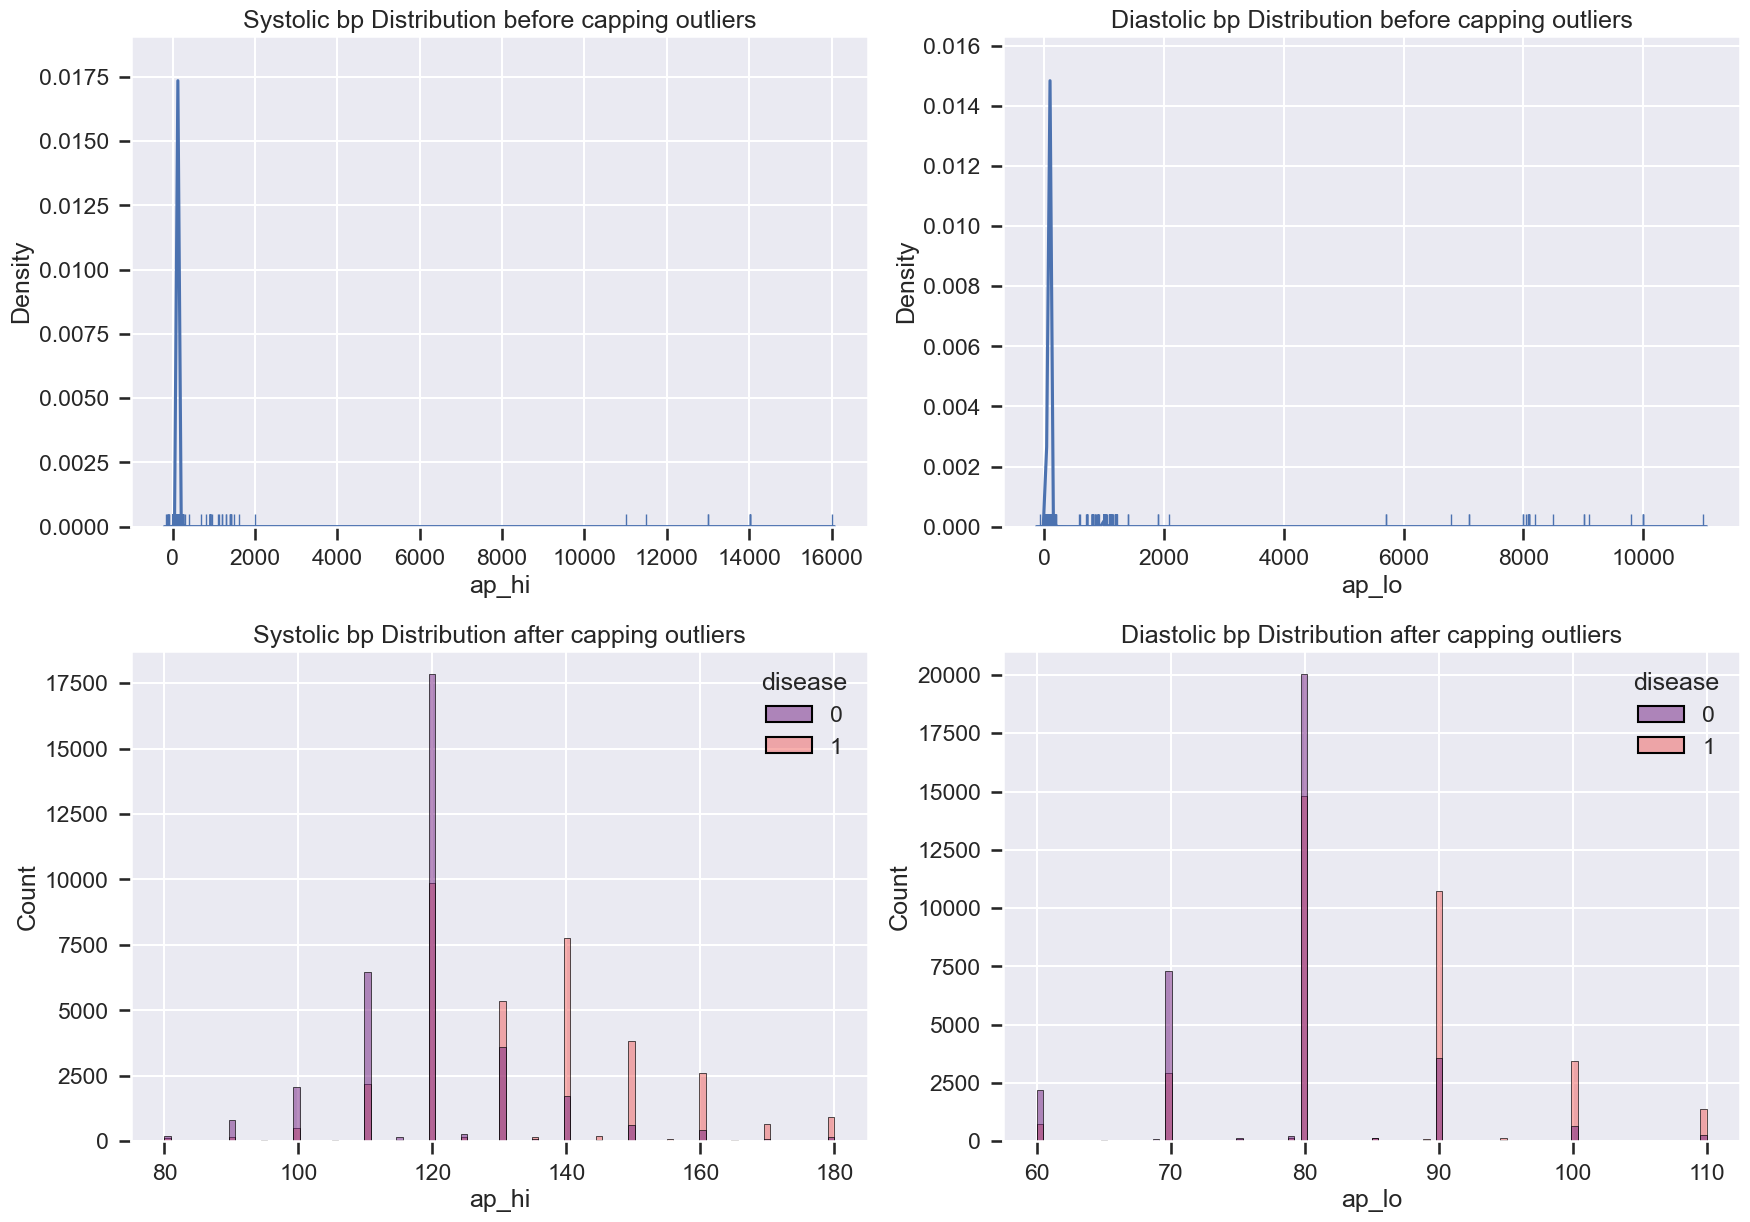

In [31]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
#sns.histplot(data=df, x='ap_hi', hue="disease",palette='magma')
sns.distplot(df['ap_hi'],  hist=False, rug=True);
plt.title('Systolic bp Distribution before capping outliers')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
#sns.histplot(data=df, x='ap_lo', hue="disease",palette='magma')
sns.distplot(df['ap_lo'],  hist=False, rug=True);
plt.title('Diastolic bp Distribution before capping outliers')

## cap the outliers using max thresholds
##
df['ap_hi'] =  df['ap_hi'].clip(lower=80, upper=180)
df['ap_lo'] =  df['ap_lo'].clip(lower=60, upper=110)

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='ap_hi', hue="disease",palette='magma')
#sns.distplot(df['ap_hi'],  hist=False, rug=True);
plt.title('Systolic bp Distribution after capping outliers')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='ap_lo', hue="disease",palette='magma')
#sns.distplot(df['ap_lo'],  hist=False, rug=True);
plt.title('Diastolic bp Distribution after capping outliers')




### Normalize a Pandas Column with Maximum Absolute Scaling using Pandas

In [32]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

In [33]:
#df['age'] = absolute_maximum_scale(df['age'])
#df['weight'] = absolute_maximum_scale(df['weight'])
#df['height'] = absolute_maximum_scale(df['height'])
#df['ap_hi'] = absolute_maximum_scale(df['ap_hi'])
#df['ap_lo'] = absolute_maximum_scale(df['ap_lo'])

In [34]:
df.head()

,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,Indonesia,1,50,0,110,80,1,2,1,168,Architect,0,62,0
1,Malaysia,1,55,0,140,90,3,1,1,156,Accountant,0,85,1
2,Indonesia,0,52,0,130,70,3,1,1,165,Chef,0,64,1
3,Singapore,1,48,0,150,100,1,2,1,169,Lawyer,0,82,1
4,Singapore,0,48,0,100,60,1,1,1,156,Architect,0,56,0


### Correlation Matrix

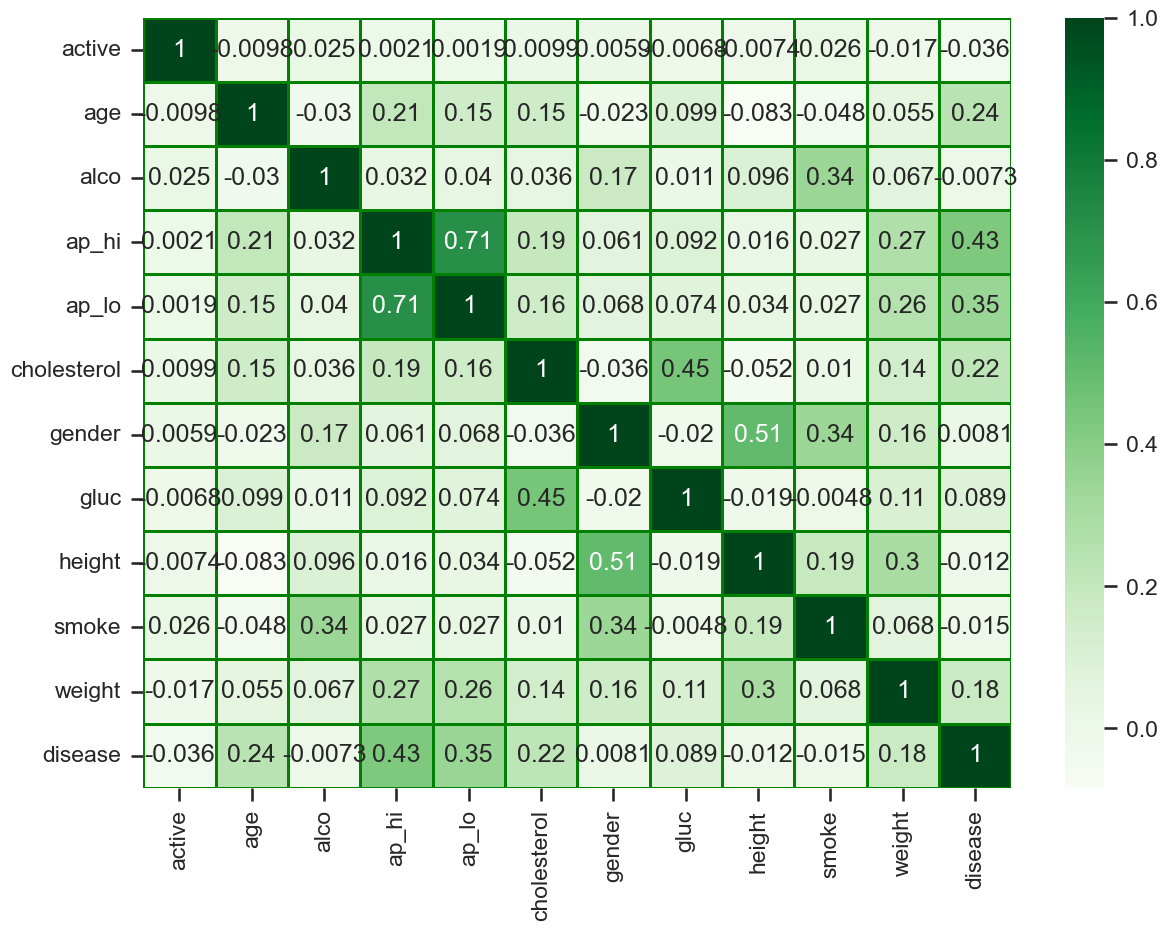

In [35]:
plt.figure(figsize = (14, 10)) 
sns.heatmap(df.corr(), cmap='Greens',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

### Pairplot

In [36]:
#sns.pairplot(df, hue='disease')
#plt.show()

In [37]:
#from dataprep.eda import create_report

In [38]:
#create_report(df).show()

## 4. Data Preparation

### One Hot Encoding

In [39]:
def OneHotEncoding(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([df,dummies],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True) 
  if(finallencol==len(df.columns)):
    print('OneHotEncoding is sucessfull') 
    print('')
  else:
    print('Unsucessfull')
  return df.head(5)

In [40]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each[0:3], drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df.drop(each,axis=1,inplace=True)
    return df

Try dropping country and occupation for better result, or else do one hot encoding.
Drop alco as it has very low correlation with diesease.

In [41]:
#df.rename(columns={'country': 'c', 'occupation': 'o'}, inplace=True)
df.drop(['country','alco'], axis='columns', inplace=True)

#OneHotEncoding(df['o'])
#OneHotEncoding(df['gender'])
df = one_hot(df, ['gender','occupation'])

In [42]:
#df.describe().columns.to_list()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   active          70000 non-null  int64
 1   age             70000 non-null  int32
 2   ap_hi           70000 non-null  int64
 3   ap_lo           70000 non-null  int64
 4   cholesterol     70000 non-null  int64
 5   gluc            70000 non-null  int64
 6   height          70000 non-null  int64
 7   smoke           70000 non-null  int64
 8   weight          70000 non-null  int32
 9   disease         70000 non-null  int64
 10  gen_1           70000 non-null  uint8
 11  gen_2           70000 non-null  uint8
 12  occ_Accountant  70000 non-null  uint8
 13  occ_Architect   70000 non-null  uint8
 14  occ_Chef        70000 non-null  uint8
 15  occ_Doctor      70000 non-null  uint8
 16  occ_Engineer    70000 non-null  uint8
 17  occ_Lawyer      70000 non-null  uint8
 18  occ_Nurse       70000 non-

In [43]:
df.corr()

,active,age,ap_hi,ap_lo,cholesterol,gluc,height,smoke,weight,disease,...,gen_2,occ_Accountant,occ_Architect,occ_Chef,occ_Doctor,occ_Engineer,occ_Lawyer,occ_Nurse,occ_Others,occ_Teacher
active,1.000000,-0.009819,0.002073,0.001885,0.009911,-0.006770,-0.007371,0.025858,-0.017232,-0.035653,...,0.005866,0.003121,-0.001997,-0.001285,0.001383,-0.005554,0.004205,-0.000622,0.000510,0.000225
age,-0.009819,1.000000,0.205757,0.153323,0.154386,0.098596,-0.083416,-0.047884,0.054604,0.237749,...,-0.023017,-0.004126,-0.002147,-0.000665,-0.002198,0.001368,-0.001499,0.009625,0.000395,-0.000805
ap_hi,0.002073,0.205757,1.000000,0.710392,0.194998,0.091922,0.016007,0.027429,0.270072,0.428081,...,0.060843,0.001208,-0.002390,0.001473,-0.002112,-0.004466,0.002333,0.002194,-0.002331,0.004083
ap_lo,0.001885,0.153323,0.710392,1.000000,0.161295,0.074305,0.033703,0.026856,0.255305,0.347656,...,0.068382,0.003251,-0.000488,0.003344,-0.000442,0.001442,-0.000518,-0.003715,-0.005168,0.002340
cholesterol,0.009911,0.154386,0.194998,0.161295,1.000000,0.451578,-0.052055,0.010354,0.142623,0.221147,...,-0.035821,-0.000238,-0.001789,-0.004447,0.000258,0.000102,0.004125,0.006495,-0.000024,-0.004547
gluc,-0.006770,0.098596,0.091922,0.074305,0.451578,1.000000,-0.019475,-0.004756,0.107459,0.089307,...,-0.020491,-0.005865,-0.000711,-0.002225,0.000682,0.000773,0.004477,0.006693,0.000927,-0.004781
height,-0.007371,-0.083416,0.016007,0.033703,-0.052055,-0.019475,1.000000,0.191508,0.299501,-0.011502,...,0.508442,-0.002296,0.001882,-0.002936,0.000242,0.011344,-0.002029,-0.002644,-0.002453,-0.001055
smoke,0.025858,-0.047884,0.027429,0.026856,0.010354,-0.004756,0.191508,1.000000,0.068240,-0.015486,...,0.338135,-0.000218,-0.000237,-0.004442,0.005846,0.002221,0.005418,-0.001856,-0.006169,-0.000498
weight,-0.017232,0.054604,0.270072,0.255305,0.142623,0.107459,0.299501,0.068240,1.000000,0.182715,...,0.156375,0.000564,0.002422,0.001610,0.000424,0.001975,0.003524,-0.000135,-0.004084,-0.006319
disease,-0.035653,0.237749,0.428081,0.347656,0.221147,0.089307,-0.011502,-0.015486,0.182715,1.000000,...,0.008109,0.006497,-0.000013,-0.003300,-0.002168,-0.004672,0.001532,-0.001185,0.000621,0.002633


### Separating the data into feature and target data.

In [44]:
X = df.drop(['disease'], axis = 1)
y = df.disease.values

### Assigning the data for training and test set

In [45]:
# Let’s create a training and test split where 30% of the dataset is set aside for testing purposes.
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 20)
X_train

,active,age,ap_hi,ap_lo,cholesterol,gluc,height,smoke,weight,gen_1,gen_2,occ_Accountant,occ_Architect,occ_Chef,occ_Doctor,occ_Engineer,occ_Lawyer,occ_Nurse,occ_Others,occ_Teacher
18827,1,48,120,80,1,1,162,0,76,1,0,0,0,0,0,1,0,0,0,0
28390,1,50,130,80,1,1,167,0,62,1,0,1,0,0,0,0,0,0,0,0
4408,1,47,110,80,1,1,157,0,80,1,0,0,0,0,0,0,1,0,0,0
20477,1,39,120,80,1,1,158,0,80,1,0,0,1,0,0,0,0,0,0,0
18401,0,44,150,100,2,2,173,1,95,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,1,54,130,90,1,2,161,0,74,1,0,1,0,0,0,0,0,0,0,0
47497,0,56,120,80,1,1,150,0,84,1,0,0,0,0,1,0,0,0,0,0
31962,1,52,120,80,1,1,164,0,62,1,0,0,0,0,1,0,0,0,0,0
23775,1,56,110,70,1,1,166,0,70,1,0,0,0,0,0,0,1,0,0,0


Use StandardScaler only after splitting the data into train/test, and fit the scaler on your training data only, then standardise both training and test sets with that scaler. By fitting the scaler on the full dataset prior to splitting, information about the test set is used to transform the training set, which in turn is passed downstream.

In [46]:
from sklearn.preprocessing import StandardScaler

# list for cols to scale
cols_to_scale = ['age','ap_hi','ap_lo','cholesterol','gluc','height','weight']

# create and fit scaler
scaler = StandardScaler()

# scale selected data
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_train

,active,age,ap_hi,ap_lo,cholesterol,gluc,height,smoke,weight,gen_1,gen_2,occ_Accountant,occ_Architect,occ_Chef,occ_Doctor,occ_Engineer,occ_Lawyer,occ_Nurse,occ_Others,occ_Teacher
18827,1,-0.797841,-0.406311,-0.173902,-0.540872,-0.395285,-0.289024,0,0.130499,1,0,0,0,0,0,1,0,0,0,0
28390,1,-0.501931,0.184987,-0.173902,-0.540872,-0.395285,0.333330,0,-0.852668,1,0,1,0,0,0,0,0,0,0,0
4408,1,-0.945797,-0.997609,-0.173902,-0.540872,-0.395285,-0.911378,0,0.411404,1,0,0,0,0,0,0,1,0,0,0
20477,1,-2.129439,-0.406311,-0.173902,-0.540872,-0.395285,-0.786907,0,0.411404,1,0,0,1,0,0,0,0,0,0,0
18401,0,-1.389662,1.367583,1.865463,0.924743,1.351084,1.080155,1,1.464797,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,1,0.089890,0.184987,0.845781,-0.540872,1.351084,-0.413495,0,-0.009953,1,0,1,0,0,0,0,0,0,0,0
47497,0,0.385801,-0.406311,-0.173902,-0.540872,-0.395285,-1.782674,0,0.692309,1,0,0,0,0,1,0,0,0,0,0
31962,1,-0.206020,-0.406311,-0.173902,-0.540872,-0.395285,-0.040082,0,-0.852668,1,0,0,0,0,1,0,0,0,0,0
23775,1,0.385801,-0.997609,-1.193584,-0.540872,-0.395285,0.208859,0,-0.290858,1,0,0,0,0,0,0,1,0,0,0


## 5. Data modelling

We will try these classification algorithms to classify the target variable (disease) based on independent variables.

1) Neural Network
2) Logistic regression
3) K nearest neighbors
4) Support vector machine
5) Decision tree
6) Gradient Boosting
7) Random forest

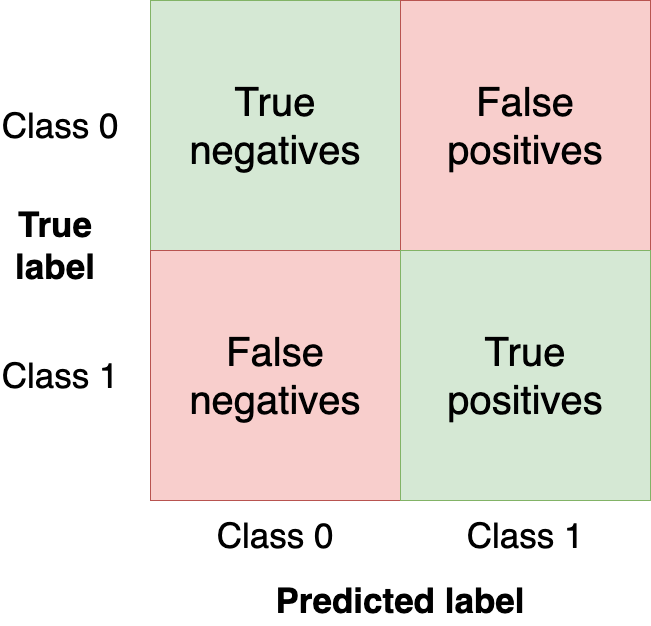

All models are evaluated considering the Confusion Matrix.
Basic terminology:

1) True Positives (TP): Correct prediction that they do have heart disease
2) True Negatives (TN): Correct prediction that they don't have heart disease
3) False Positives (FP): Incorrect prediction that they do have heart disease (a "Type I error")
4) False Negatives (FN): Incorrect prediction that they don't have heart disease (a "Type II error")

A Type I Error happens when the model makes an incorrect prediction of an actual negative value as positive.

A Type II Error happens when the model makes an incorrect prediction of an actual positive value as negative.
    

### Accuracy = (TP + TN) / (TP + FP + TN + FN)
### Precision = TP / (TP + FP)¶
### Recall = TP / (TP + FN)


Recall is a useful metric in cases where False Negative trumps False Positive. Recall is important in medical cases where it doesn’t matter whether we raise a false alarm, but the actual positive cases should not go undetected!

In practice, when we try to increase the precision of our model, the recall goes down, and vice-versa. F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.

### 5.0 Neural Network

Keras is a powerful easy-to-use Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in a few short lines of code

### Importing the Keras libraries and packages

Epoch 1/20
4900/4900 [==============================] - 4s 783us/step - loss: 0.2041 - accuracy: 0.6902
Epoch 2/20
4900/4900 [==============================] - 5s 930us/step - loss: 0.1879 - accuracy: 0.7221
Epoch 3/20
4900/4900 [==============================] - 5s 947us/step - loss: 0.1859 - accuracy: 0.7267
Epoch 4/20
4900/4900 [==============================] - 5s 927us/step - loss: 0.1854 - accuracy: 0.7275
Epoch 5/20
4900/4900 [==============================] - 5s 939us/step - loss: 0.1847 - accuracy: 0.7290
Epoch 6/20
4900/4900 [==============================] - 5s 942us/step - loss: 0.1843 - accuracy: 0.7281
Epoch 7/20
4900/4900 [==============================] - 4s 890us/step - loss: 0.1840 - accuracy: 0.7298
Epoch 8/20
4900/4900 [==============================] - 6s 1ms/step - loss: 0.1837 - accuracy: 0.7291
Epoch 9/20
4900/4900 [==============================] - 5s 1ms/step - loss: 0.1835 - accuracy: 0.7303
Epoch 10/20
4900/4900 [==============================] - 5s 927us/st

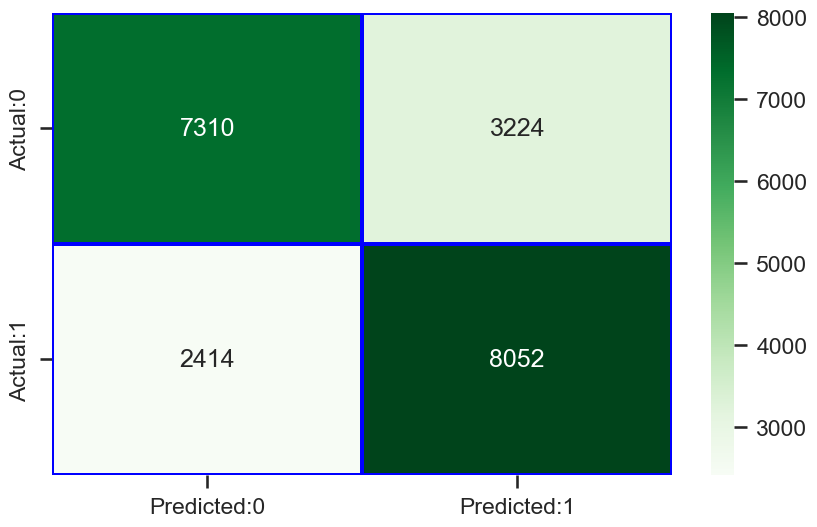

In [47]:
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

tf.random.set_seed(1234)

# model
model = tf.keras.Sequential([
keras.layers.Dense(200, input_shape=[20], activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(50, activation='relu'),
keras.layers.Dense(10, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
#keras.layers.Dense(1)    
])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics = ['accuracy'])
#model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 10, epochs=20)
y_pred = model.predict(X_test)

# set lower threshold to have lesser False Negative, thus getting higher Recall Score
#
y_pred = (y_pred > 0.4)

acNN=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',acNN*100, "%")
acclist = []
acclist.append(acNN)

# Displaying Confusion Matrix and various scores
#
cm = confusion_matrix(y_test, y_pred.round())
print("Confusion Matrix is:\n",cm)
print('Precision: %.3f' % precision_score(y_test, y_pred.round()))
print('Recall: %.3f' % recall_score(y_test, y_pred.round()))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred.round()))
print('F1 Score: %.3f' % f1_score(y_test, y_pred.round()))
#print("Classification Report is:\n\n",classification_report(y_test,y_pred.round()))
recallList = []
recallList.append(recall_score(y_test, y_pred.round()))

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 


### 5.1 Logistic Regression Classification

In [48]:
# Importing the algorithms
from sklearn.linear_model import LogisticRegression
from sklearn import metrics # for checking the model accuracy


In [49]:
# instantiating and training the model on training dataset, 
# and making predictions for the testing data

log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
acLog = accuracy_score(y_pred, y_test)
print("The accuracy of logistic regression is:", acLog*100, "%")
acclist.append(acLog)

The accuracy of logistic regression is: 73.43809523809523 %


### Confusion Matrix & Classification Report

Confusion Matrix is:
 [[8294 2240]
 [3338 7128]]
Precision: 0.761
Recall: 0.681
Accuracy: 0.734
F1 Score: 0.719


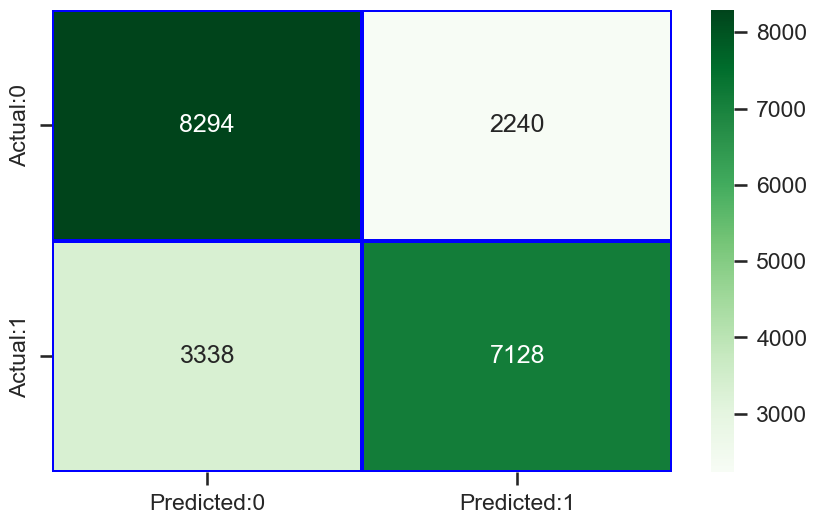

In [50]:
cm = confusion_matrix(y_test,y_pred) 
print("Confusion Matrix is:\n",cm)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
#print("Classification Report is:\n\n",classification_report(y_test,y_pred))
recallList.append(recall_score(y_test, y_pred))

conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

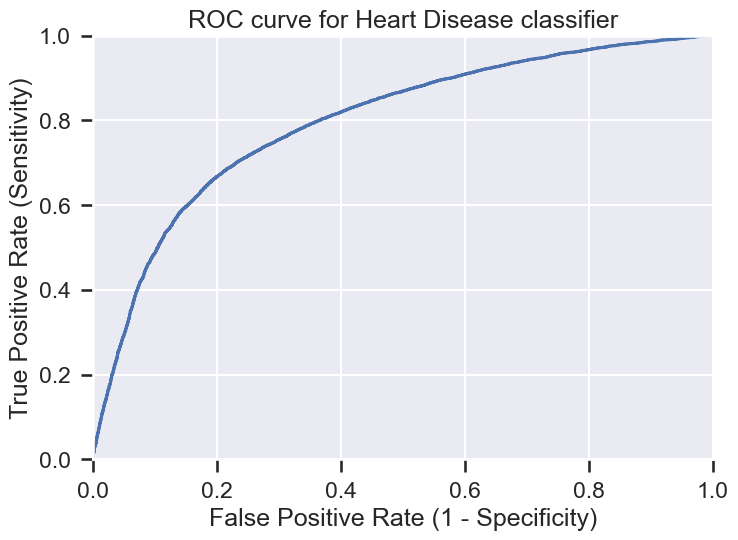

In [51]:
import matplotlib.pyplot as plt

y_pred_prob = log.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold.

### 5.2 k-Nearest Neighbor (k-NN) Classification

In [52]:
# importing the model

from sklearn.neighbors import KNeighborsClassifier

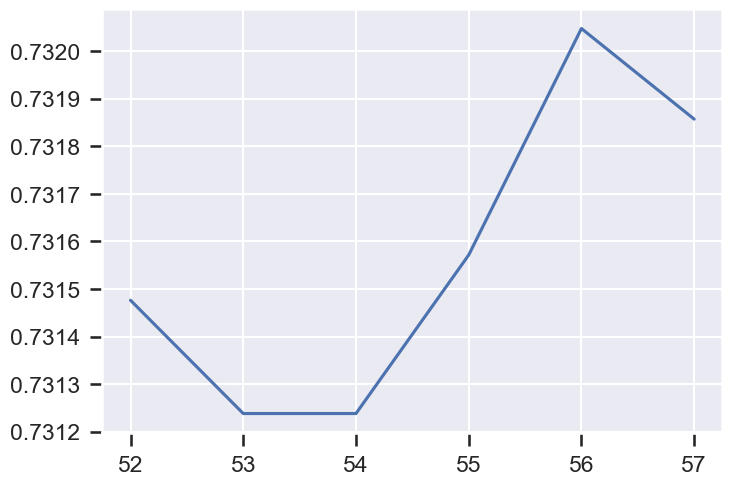

In [53]:
# Finding optimum number of neighbors

lst = []
for neighbors in range(52,58):
    classifier = KNeighborsClassifier(n_neighbors=neighbors)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test.values)
    lst.append(accuracy_score(y_test,y_pred))

plt.plot((range(52,58)),lst)
plt.show()

In [54]:
# we will take 3 neighbors to find a majority. Default is 5.

knn= KNeighborsClassifier(n_neighbors = 55)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test.values)
acKNN = accuracy_score(y_pred, y_test)
print("The accuracy of KNN model is:", acKNN*100, "%")
acclist.append(acKNN)

The accuracy of KNN model is: 73.15714285714286 %


### Confusion Matrix & Classification Report

Confusion Matrix is:
 [[8417 2117]
 [3520 6946]]
Precision: 0.766
Recall: 0.664
Accuracy: 0.732
F1 Score: 0.711


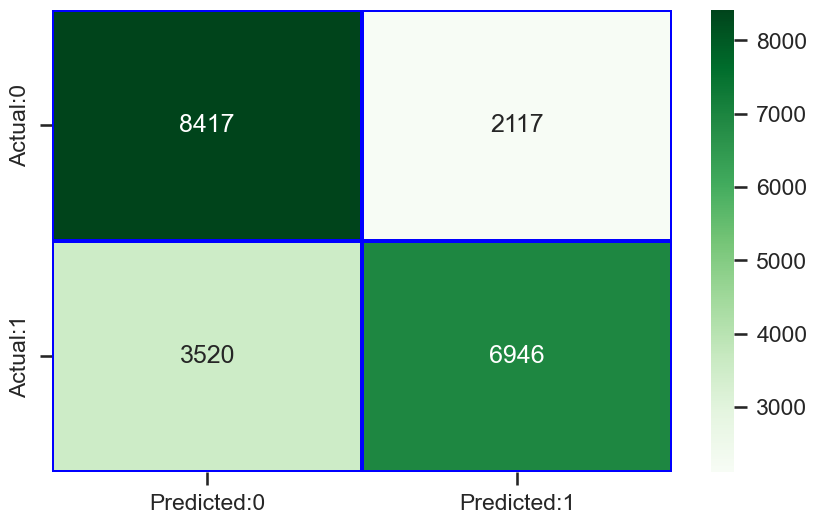

In [55]:
cm = confusion_matrix(y_test,y_pred) 
print("Confusion Matrix is:\n",cm)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
#print("Classification Report is:\n\n",classification_report(y_test,KNNprediction))
recallList.append(recall_score(y_test, y_pred))

conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

### 5.3 Support Vector Machine

In [56]:
# Support Vector Machine (SVM) Classifier Algorithm
from sklearn.svm import SVC

In [57]:
svc=SVC()   # SVC stands for Support Vector Classifier
#svc=SVC(kernel='rbf', random_state=100)
svc.fit(X_train,y_train) 
y_pred=svc.predict(X_test)
acSVM = metrics.accuracy_score(y_pred,y_test)
print("The accuracy of SVM model is:", acSVM*100, "%")
acclist.append(acSVM)

The accuracy of SVM model is: 74.06666666666666 %


### Confusion Matrix & Classification Report

Confusion Matrix is:
 [[8346 2188]
 [3258 7208]]
Precision: 0.767
Recall: 0.689
Accuracy: 0.741
F1 Score: 0.726


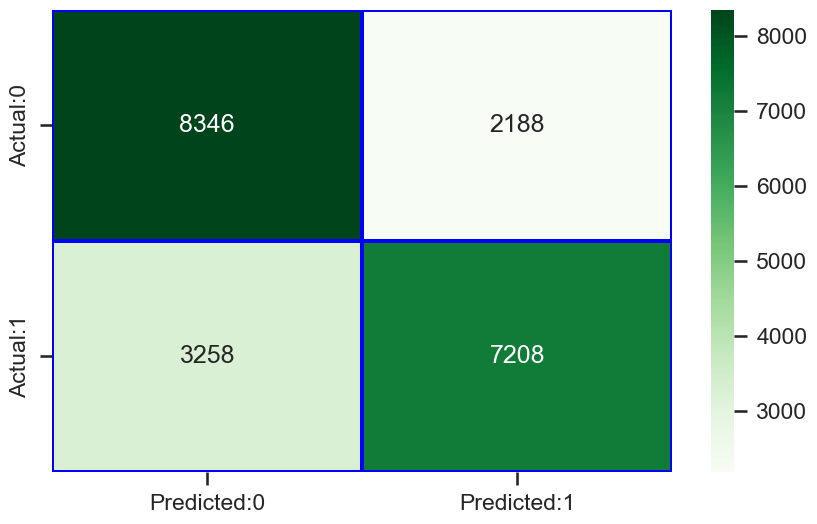

In [58]:
cm = confusion_matrix(y_test,y_pred) 
print("Confusion Matrix is:\n",cm)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
#print("Classification Report is:\n\n",classification_report(y_test,svcPrediction))
recallList.append(recall_score(y_test, y_pred))

conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

### 5.4 Decision Tree Classifier


In [59]:
# import the model
from sklearn.tree import DecisionTreeClassifier

In [60]:
tree= DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
acDT = metrics.accuracy_score(y_pred,y_test)
print("The accuracy of Decision Tree model is:", acDT*100, "%")
acclist.append(acDT)

The accuracy of Decision Tree model is: 63.909523809523805 %


### Confusion Matrix & Classification Report

Confusion Matrix is:
 [[6798 3736]
 [3843 6623]]
Precision: 0.639
Recall: 0.633
Accuracy: 0.639
F1 Score: 0.636


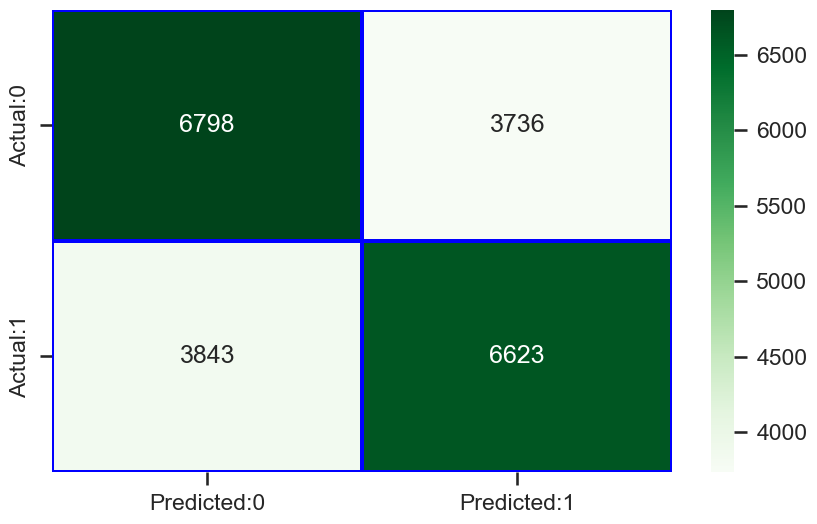

In [61]:
cm = confusion_matrix(y_test,y_pred) 
print("Confusion Matrix is:\n",cm)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
#print("Classification Report is:\n\n",classification_report(y_test,treePrediction))
recallList.append(recall_score(y_test, y_pred))

conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

### 5.5 Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gb = GradientBoostingClassifier()
model = gb.fit(X_train, y_train)
y_pred = model.predict(X_test)
acGB = accuracy_score(y_test, y_pred)
print("The accuracy of GradientBoosting model is:", acGB*100, "%")
acclist.append(acGB)

The accuracy of GradientBoosting model is: 74.11904761904762 %


Confusion Matrix is:
 [[8209 2325]
 [3110 7356]]
Precision: 0.760
Recall: 0.703
Accuracy: 0.741
F1 Score: 0.730


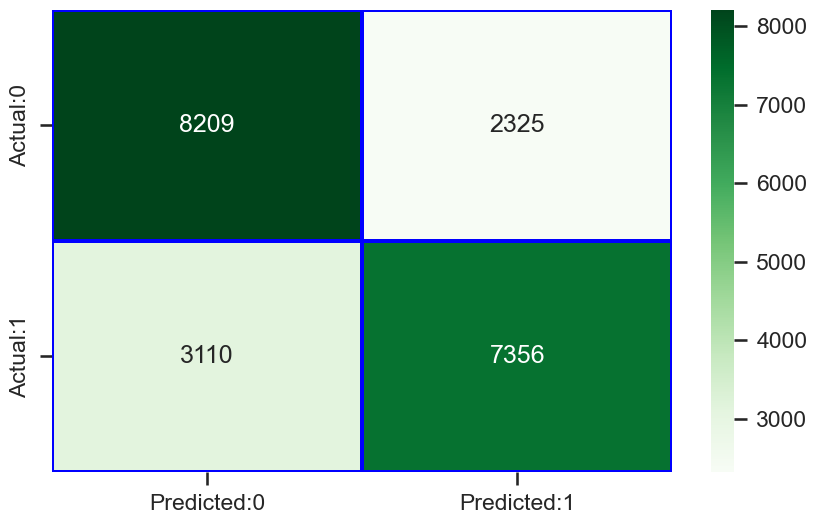

In [64]:
cm = confusion_matrix(y_test,y_pred) 
print("Confusion Matrix is:\n",cm)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
#print("Classification Report is:\n\n",classification_report(y_test,y_pred))
recallList.append(recall_score(y_test, y_pred))

conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

### 5.6 Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(n_estimators=55)
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)
acRF = accuracy_score(y_test, y_pred)
print("The accuracy of RandomForest model is:", acRF*100, "%")
acclist.append(acRF)

The accuracy of RandomForest model is: 72.18095238095238 %


Confusion Matrix is:
 [[7702 2832]
 [3010 7456]]
Precision: 0.725
Recall: 0.712
Accuracy: 0.722
F1 Score: 0.719


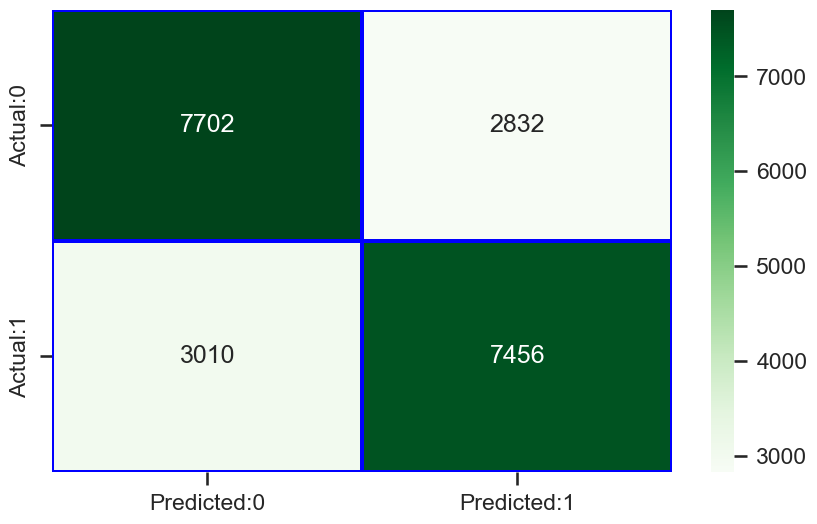

In [67]:
cm = confusion_matrix(y_test,y_pred) 
print("Confusion Matrix is:\n",cm)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
#print("Classification Report is:\n\n",classification_report(y_test,y_pred))
recallList.append(recall_score(y_test, y_pred))

conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

## 6. Model Performance Evaluation

### Accuracy score

In [68]:
print("The accuracy of Neural Network is:", acNN*100, "%")
print("The accuracy of logistic regression is:", acLog*100, "%")
print("The accuracy of KNN model is:", acKNN*100, "%")
print("The accuracy of SVM model is:", acSVM*100, "%")
print("The accuracy of Decision Tree model is:", acDT*100, "%")
print("The accuracy of Gradient Boosting is:", acGB*100, "%")
print("The accuracy of Random Forest model is:", acRF*100, "%")

The accuracy of Neural Network is: 73.15238095238095 %
The accuracy of logistic regression is: 73.43809523809523 %
The accuracy of KNN model is: 73.15714285714286 %
The accuracy of SVM model is: 74.06666666666666 %
The accuracy of Decision Tree model is: 63.909523809523805 %
The accuracy of Gradient Boosting is: 74.11904761904762 %
The accuracy of Random Forest model is: 72.18095238095238 %


In [69]:
models = ['Neural Network','Logistic Regression','kNN','SVM','Decision Tree','Gradient Boosting','Random Forest']

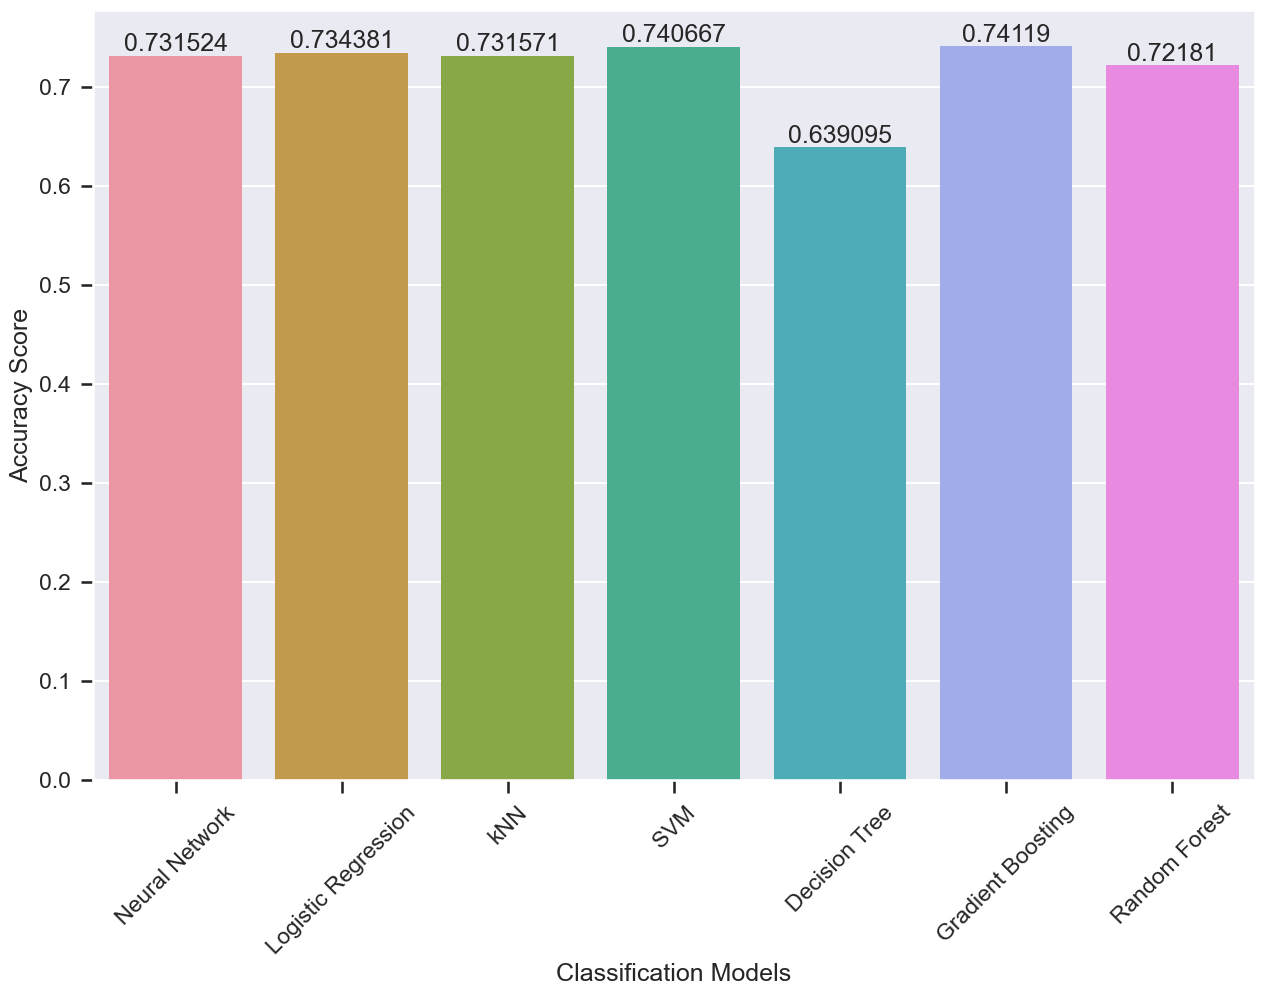

In [70]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=models, y=acclist)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()


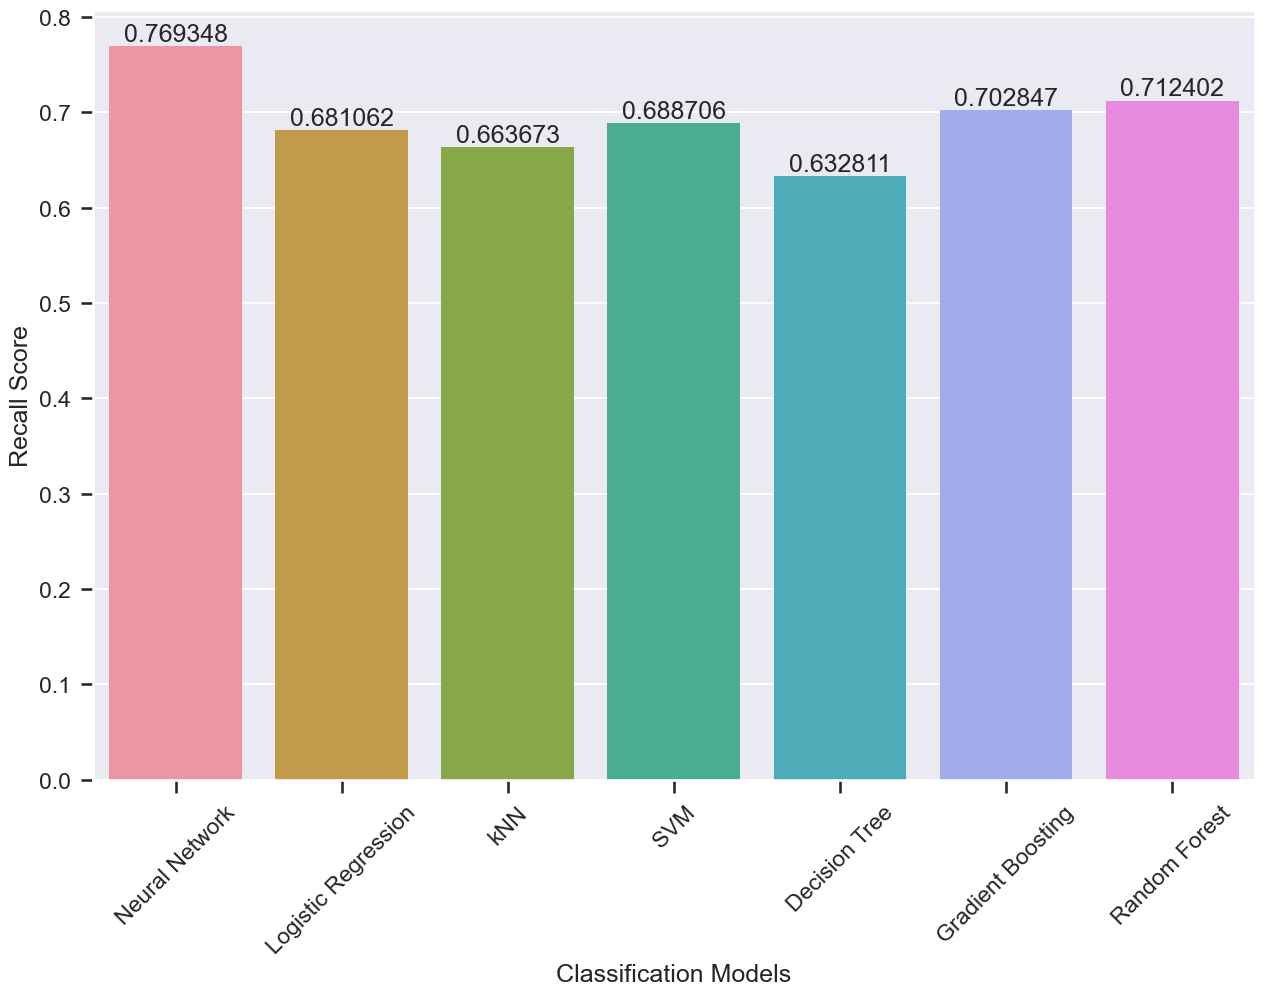

In [71]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=models, y=recallList)
plt.xlabel('Classification Models')
plt.ylabel('Recall Score')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

### Conclusion:

1) For Accuracy score only, Gradient boosting and SVM are the best performers in classifying the dataset. For Recall score only, Neural Network, Random Forest and Gradient Boosting are the best performers.

2) Neural Network has overfitting issue when accuracy reaches 74%.

3) Because of very low correlation, a few independent variables (date, id, alco, country) are removed.

4) One-hot-encoding (for Occupation variable) and scaling (on numeric variables of X) improve the accuracy of classification models. 

4) In medical diagnosis, the Recall score should be high otherwise greater number of false negatives would prove to be fatal to the life of patients. 

5) A model with a low Recall score may miss some cases of heart disease, leading to delayed diagnosis and potentially worse outcomes for patients.